# Project Implementation

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
%matplotlib inline

import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.patches as mpatches
from sklearn.tree import DecisionTreeRegressor

In [2]:
#Load the cleaned data set
data = pd.read_csv('new_autos_dropped.csv', sep=',',encoding='ISO-8859-1')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202407 entries, 0 to 202406
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    202407 non-null  int64 
 1   offer_type    202407 non-null  object
 2   price         202407 non-null  int64 
 3   vehicle_type  202407 non-null  object
 4   gearbox       202407 non-null  object
 5   power_ps      202407 non-null  int64 
 6   model         202407 non-null  object
 7   kilometer     202407 non-null  int64 
 8   fuel_type     202407 non-null  object
 9   brand         202407 non-null  object
 10  postal_code   202407 non-null  int64 
 11  vehicleAge    202407 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 18.5+ MB


In [4]:
data.describe()

,Unnamed: 0,price,power_ps,kilometer,postal_code,vehicleAge
count,202407.000000,202407.000000,202407.000000,202407.000000,202407.000000,202407.000000
mean,185495.880434,7410.770166,132.414432,121650.387585,52315.878389,198.972264
std,107322.315616,7522.448146,59.956473,40519.626154,25751.456935,58.471704
min,3.000000,600.000000,30.000000,5000.000000,1067.000000,72.000000
25%,92370.500000,2200.000000,90.000000,90000.000000,31832.000000,153.000000
50%,185319.000000,4900.000000,122.000000,150000.000000,51570.000000,198.000000
75%,278578.500000,9900.000000,163.000000,150000.000000,73240.000000,245.000000
max,371527.000000,60000.000000,500.000000,150000.000000,99998.000000,324.000000


In [5]:
data.head()

,Unnamed: 0,offer_type,price,vehicle_type,gearbox,power_ps,model,kilometer,fuel_type,brand,postal_code,vehicleAge
0,3,Angebot,1500,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,91074,246
1,4,Angebot,3600,kleinwagen,manuell,69,fabia,90000,diesel,skoda,60437,161
2,6,Angebot,2200,cabrio,manuell,109,2_reihe,150000,benzin,peugeot,67112,208
3,10,Angebot,2000,limousine,manuell,105,3_reihe,150000,benzin,mazda,96224,204
4,14,Angebot,17999,suv,manuell,190,navara,70000,diesel,nissan,4177,129


In [6]:
#Dropping Columns "Unnamed:0" and "postal_code"
data = data.drop('Unnamed: 0',1)
data = data.drop('postal_code',1)

In [7]:
#Making a copy the dataframe
new_autos = data.copy()

In [8]:
new_autos.describe()

,price,power_ps,kilometer,vehicleAge
count,202407.000000,202407.000000,202407.000000,202407.000000
mean,7410.770166,132.414432,121650.387585,198.972264
std,7522.448146,59.956473,40519.626154,58.471704
min,600.000000,30.000000,5000.000000,72.000000
25%,2200.000000,90.000000,90000.000000,153.000000
50%,4900.000000,122.000000,150000.000000,198.000000
75%,9900.000000,163.000000,150000.000000,245.000000
max,60000.000000,500.000000,150000.000000,324.000000


In [9]:
data.head()

,offer_type,price,vehicle_type,gearbox,power_ps,model,kilometer,fuel_type,brand,vehicleAge
0,Angebot,1500,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,246
1,Angebot,3600,kleinwagen,manuell,69,fabia,90000,diesel,skoda,161
2,Angebot,2200,cabrio,manuell,109,2_reihe,150000,benzin,peugeot,208
3,Angebot,2000,limousine,manuell,105,3_reihe,150000,benzin,mazda,204
4,Angebot,17999,suv,manuell,190,navara,70000,diesel,nissan,129


In [10]:
#Encoding the columns with character data
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
cat = new_autos.columns[new_autos.dtypes==object]
for col in cat:
    new_autos[col]= le.fit_transform(new_autos[col])
new_autos.head()

,offer_type,price,vehicle_type,gearbox,power_ps,model,kilometer,fuel_type,brand,vehicleAge
0,0,1500,3,1,75,116,150000,0,37,246
1,0,3600,3,1,69,101,90000,2,31,161
2,0,2200,1,1,109,7,150000,0,25,208
3,0,2000,5,1,105,9,150000,0,19,204
4,0,17999,6,1,190,159,70000,2,23,129


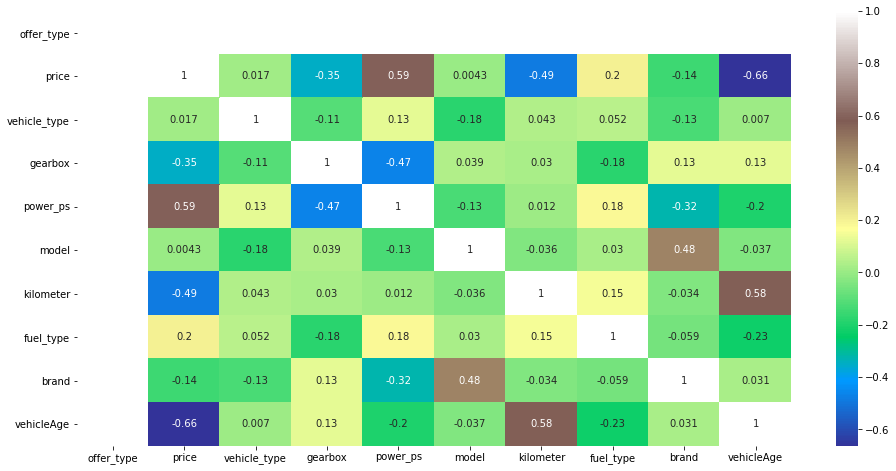

In [11]:
#Plot the heatmap for visualizing the correlation between attributes
plt.figure(figsize=(16,8))
sns.heatmap(new_autos.corr(), annot=True,cmap="terrain", )
plt.show()

In [12]:
sample_data = new_autos.sample(frac=0.01, replace=True)
y=sample_data['price']
X=sample_data.drop(['price'], axis=1)
X.shape, y.shape

((2024, 9), (2024,))

In [13]:
#GridSearchCV 
from sklearn.model_selection import GridSearchCV
def gridsearchcv(model,parameters):
    gsCV = GridSearchCV(model,parameters,n_jobs=-1, verbose=1)  
    return gsCV  

In [14]:
#GridSearchCV 
from sklearn.model_selection import GridSearchCV
gsCV_model = RandomForestRegressor(oob_score=True)
tuned_parameters = {'n_estimators': [200],
                    'max_features':[2,4,8, 'auto'],
                    'max_depth':[10,20],
                    'min_samples_split':[2,3,4,],
                    'min_samples_leaf':[1,2,3]}
gsCV = gridsearchcv(gsCV_model, tuned_parameters)  
gsCV.fit(X,y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 16.7min finished


GridSearchCV(estimator=RandomForestRegressor(oob_score=True), n_jobs=-1,
             param_grid={'max_depth': [10, 20],
                         'max_features': [2, 4, 8, 'auto'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [200]},
             verbose=1)

In [15]:
print(gsCV.best_score_)
print(gsCV.best_params_)

0.8325131015869299
{'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}


In [16]:
from collections import OrderedDict
from sklearn.datasets import make_classification
ensemble_clfs = [("RandomForestRegressor, max_depth='20', min_samples_split='3', min_samples_leaf='1'",
                  RandomForestRegressor(warm_start=True, max_features=4, max_depth=20, min_samples_split=3, min_samples_leaf=1,oob_score=True))]
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)


min_estimators = 30
max_estimators = 1000

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 50):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)
        
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

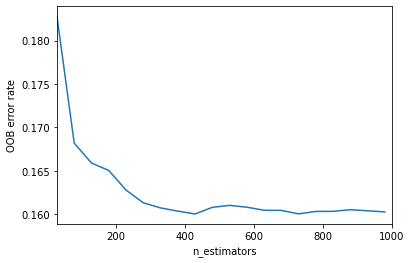

In [17]:
# Generating "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.show()

### Build train and test data

In [18]:
X=new_autos.drop(['price'], axis=1)
y=new_autos['price']

In [19]:
#splitting to test and train set..
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#format
X_train.shape,y_train.shape,X_test.shape, y_test.shape

((161925, 9), (161925,), (40482, 9), (40482,))

## Linear Regression

In [20]:
#X_train, X_test, y_train, y_test
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [21]:
Linear_pred = linear_model.predict(X_test)

In [22]:
print("Linear Regression Mean Absolute Error:")
print(mean_absolute_error(y_test, Linear_pred))
print("Linear Regression Accuracy:")
print(linear_model.score(X_test, y_test))

Linear Regression Mean Absolute Error:
2761.3315726187006
Linear Regression Accuracy:
0.7081811381413556


In [23]:
test = new_autos[new_autos['brand']==31] #31 = skoda
sample_test = test.sample(frac=0.006, replace=True)
y_tp=sample_test['price']
X_tp=sample_test.drop(['price'], axis=1)
x_input = range(X_tp.shape[0])

In [24]:
X_tp.shape, y_tp.shape

((24, 9), (24,))

#### Plot Real Price vs Estimated Price

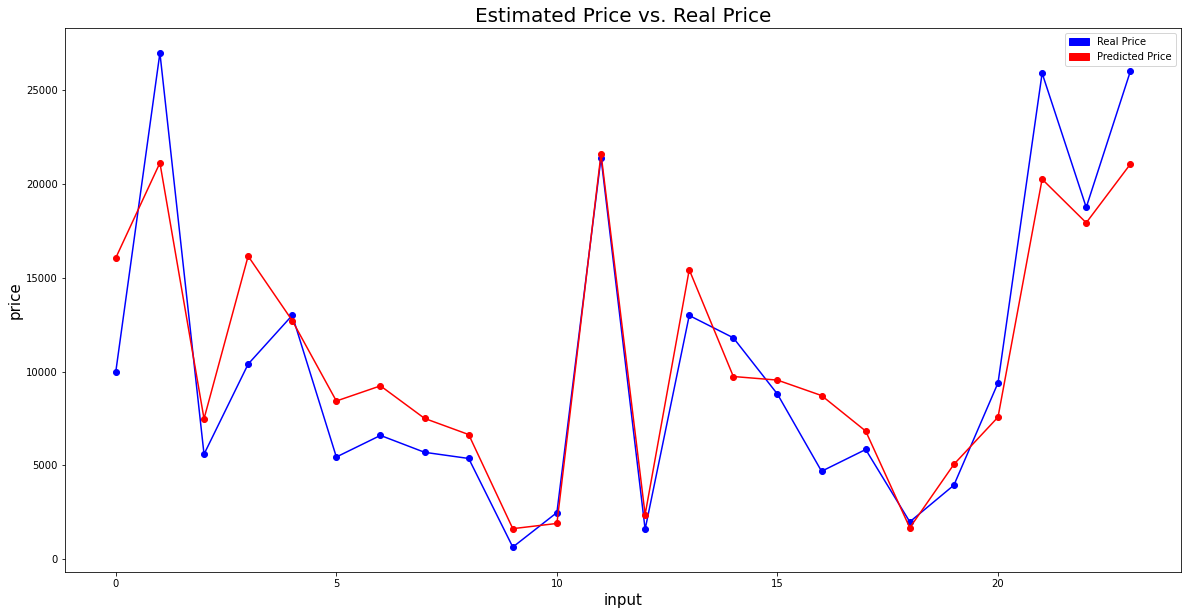

In [25]:
lin_pred= linear_model.predict(X_tp)
fig = plt.figure(figsize=(20,10))
plt.title("Estimated Price vs. Real Price",fontsize=20)
plt.xlabel("input", fontsize=15)
plt.ylabel("price", fontsize=15)

plt.plot(x_input,y_tp,marker='o',color='blue')
blue_patch = mpatches.Patch(color='blue', label= 'Real Price')

plt.plot(x_input,lin_pred,marker='o',color='red')
red_patch = mpatches.Patch(color='red', label= 'Predicted Price')

plt.legend(handles=[blue_patch,red_patch])
plt.show()

## K-Nearest Neighbors

In [26]:
#GridSearchCV 
KNCV_model = KNeighborsRegressor()
tuned_parameters = {'n_neighbors': [3,5,11,19],
                    'weights':['uniform'],
                    'metric':['euclidean','manhattan']}


In [27]:
gsCV = gridsearchcv(KNCV_model,tuned_parameters)
gsCV.fit(X,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 17.6min finished


GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform']},
             verbose=1)

In [28]:
print(gsCV.best_score_)
print(gsCV.best_params_)

0.8971390490724751
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


In [29]:
neigh = KNeighborsRegressor(n_neighbors=2, weights = 'uniform')
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [30]:
knn_pred = neigh.predict(X_test)

In [31]:
print("KNN Mean Absolute Error:")
print(mean_absolute_error(y_test, knn_pred))
print("KNN Accuracy:")
print(neigh.score(X_test,y_test))

KNN Mean Absolute Error:
1393.5133269107257
KNN Accuracy:
0.8826738377805549


#### Plot Real Price vs Estimated Price

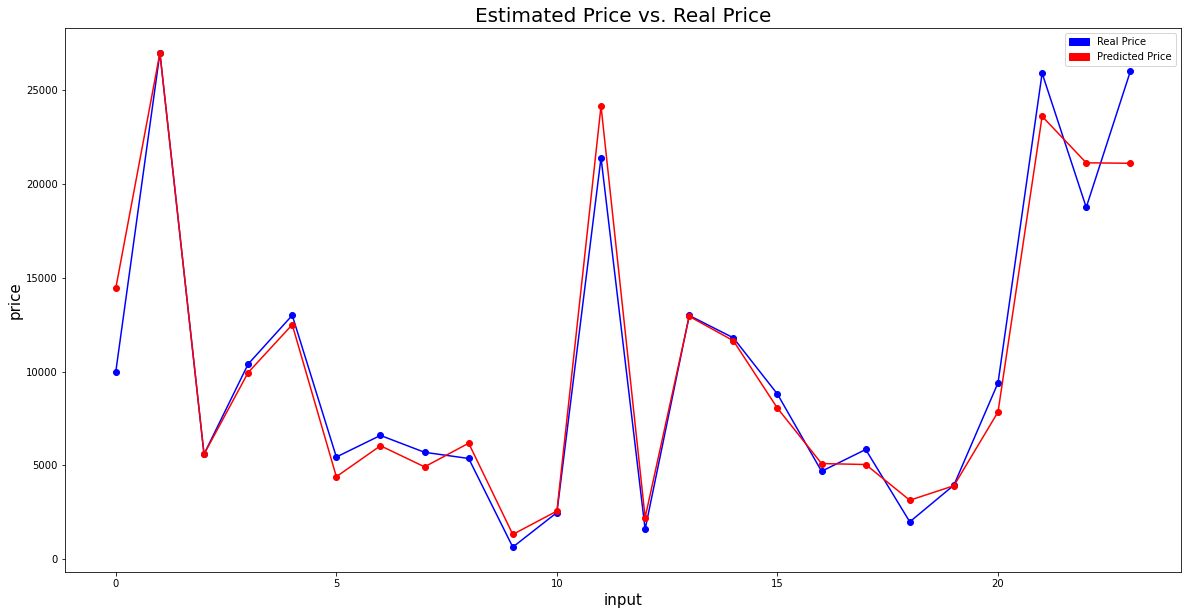

In [32]:
knnei_pred= neigh.predict(X_tp)
fig = plt.figure(figsize=(20,10))
plt.title("Estimated Price vs. Real Price",fontsize=20)
plt.xlabel("input", fontsize=15)
plt.ylabel("price", fontsize=15)

plt.plot(x_input,y_tp,marker='o',color='blue')
blue_patch = mpatches.Patch(color='blue', label= 'Real Price')

plt.plot(x_input,knnei_pred,marker='o',color='red')
red_patch = mpatches.Patch(color='red', label= 'Predicted Price')

plt.legend(handles=[blue_patch,red_patch])
plt.show()

## Neural networks

In [33]:
nn_model = MLPRegressor(hidden_layer_sizes=(128,), # Pretty much a random value here to start playing with
                        max_iter=150, # Some base line
                        verbose=True, # Well, I am just too eager :)
                        random_state=42, # We want repeatable experiments
                        alpha=0.7 #  No regularization by default... IF we have overfitting, then we will look into it
                       )
nn_model.fit(X_train, y_train)

Iteration 1, loss = 37425769.66064540
Iteration 2, loss = 25561924.55683028
Iteration 3, loss = 15816876.45975890
Iteration 4, loss = 12631291.95373305
Iteration 5, loss = 12069082.01721392
Iteration 6, loss = 11912678.65260280
Iteration 7, loss = 11858776.18617792
Iteration 8, loss = 11853054.08335236
Iteration 9, loss = 11780102.18163401
Iteration 10, loss = 11769757.80540353
Iteration 11, loss = 11699483.27952102
Iteration 12, loss = 11663336.76466549
Iteration 13, loss = 11612051.26729478
Iteration 14, loss = 11601517.79913638
Iteration 15, loss = 11568061.67990947
Iteration 16, loss = 11572688.08052303
Iteration 17, loss = 11545728.38289270
Iteration 18, loss = 11505741.09398401
Iteration 19, loss = 11484103.28764043
Iteration 20, loss = 11423841.08219055
Iteration 21, loss = 11428465.47135900
Iteration 22, loss = 11390346.86534287
Iteration 23, loss = 11431245.87629000
Iteration 24, loss = 11365031.90292977
Iteration 25, loss = 11386153.12372587
Iteration 26, loss = 11285511.1142

C:\Users\LAPTOP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.7, hidden_layer_sizes=(128,), max_iter=150,
             random_state=42, verbose=True)

In [34]:
nn_pred = nn_model.predict(X_test)

In [35]:
print("Neural Network Mean Absolute Error:")
print(mean_absolute_error(y_test, nn_pred))
print("Neural Network Accuracy:")
print(nn_model.score(X_test, y_test))

Neural Network Mean Absolute Error:
2524.6217174692747
Neural Network Accuracy:
0.7407231831438885


#### Plot Real Price vs Estimated Price

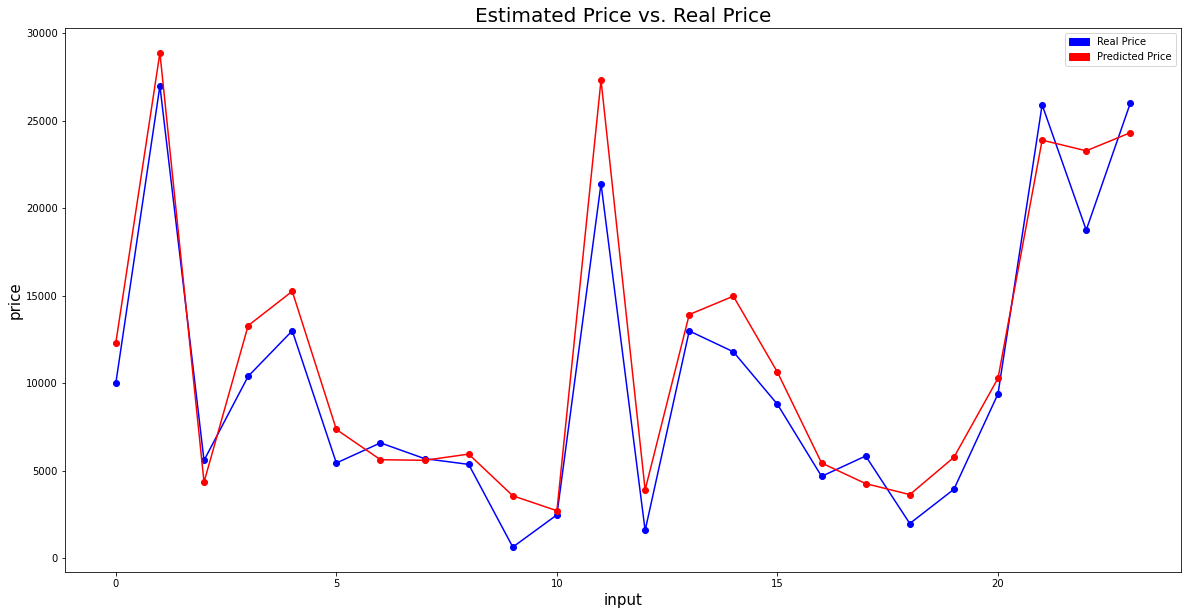

In [36]:
nni_pred= nn_model.predict(X_tp)
fig = plt.figure(figsize=(20,10))
plt.title("Estimated Price vs. Real Price",fontsize=20)
plt.xlabel("input", fontsize=15)
plt.ylabel("price", fontsize=15)

plt.plot(x_input,y_tp,marker='o',color='blue')
blue_patch = mpatches.Patch(color='blue', label= 'Real Price')

plt.plot(x_input,nni_pred,marker='o',color='red')
red_patch = mpatches.Patch(color='red', label= 'Predicted Price')

plt.legend(handles=[blue_patch,red_patch])
plt.show()

## Decision Tree

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer

depths = np.arange(1, 21)
num_leafs = [1, 5, 10, 20, 50, 100]
param_grid = [{'decisiontreeregressor__max_depth':depths,
              'decisiontreeregressor__min_samples_leaf':num_leafs}]
pipe_tree = make_pipeline(DecisionTreeRegressor(random_state=1))

In [38]:
gsCV = gridsearchcv(pipe_tree, param_grid)

In [39]:
gsCV.fit(X,y)


Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  7.7min finished


GridSearchCV(estimator=Pipeline(steps=[('decisiontreeregressor',
                                        DecisionTreeRegressor(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'decisiontreeregressor__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                          'decisiontreeregressor__min_samples_leaf': [1, 5, 10,
                                                                      20, 50,
                                                                      100]}],
             verbose=1)

In [40]:
print(gsCV.best_score_)
print(gsCV.best_params_)

0.9036271568996528
{'decisiontreeregressor__max_depth': 19, 'decisiontreeregressor__min_samples_leaf': 5}


In [41]:
regr_1 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [42]:
Decision_pred= regr_1.predict(X_test)

In [43]:
print("Decision Tree Mean Absolute Error:")
print(mean_absolute_error(y_test, Decision_pred))
print("Decision Tree  Accuracy:")
print(regr_1.score(X_test,y_test))

Decision Tree Mean Absolute Error:
1584.8566137842088
Decision Tree  Accuracy:
0.8697595212459293


#### Plot Real Price vs Estimated Price

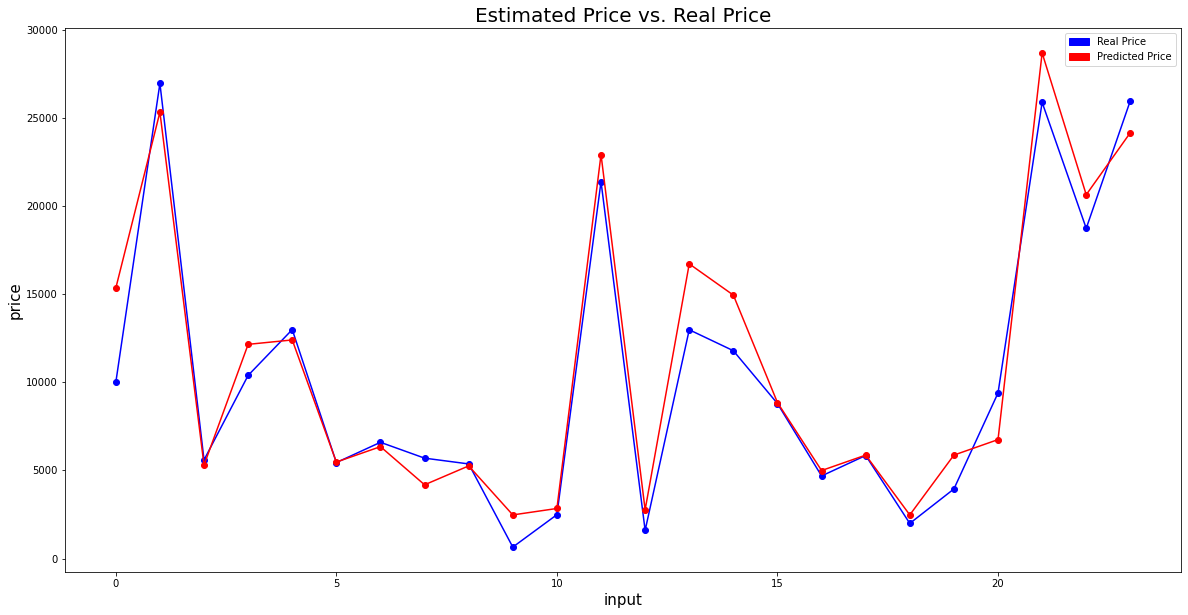

In [44]:
dec_pred= regr_1.predict(X_tp)
fig = plt.figure(figsize=(20,10))
plt.title("Estimated Price vs. Real Price",fontsize=20)
plt.xlabel("input", fontsize=15)
plt.ylabel("price", fontsize=15)

plt.plot(x_input,y_tp,marker='o',color='blue')
blue_patch = mpatches.Patch(color='blue', label= 'Real Price')

plt.plot(x_input,dec_pred,marker='o',color='red')
red_patch = mpatches.Patch(color='red', label= 'Predicted Price')

plt.legend(handles=[blue_patch,red_patch])
plt.show()

## Random Forest

In [45]:
model=RandomForestRegressor(max_features = 4, max_depth= 20, min_samples_leaf= 1, oob_score=True,
                            min_samples_split= 3, n_estimators= 500,
                            n_jobs=-1)
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, max_features=4, min_samples_split=3,
                      n_estimators=500, n_jobs=-1, oob_score=True)

In [46]:
forest_pred= model.predict(X_test)

In [47]:
print("Random Forest Mean Absolute Error:")
print(mean_absolute_error(y_test, forest_pred))
print("Random Forest Accuracy:")
print(model.score(X_test,y_test))

Random Forest Mean Absolute Error:
1097.2847181155087
Random Forest Accuracy:
0.9317995550968249


#### Plot Real Price vs Estimated Price

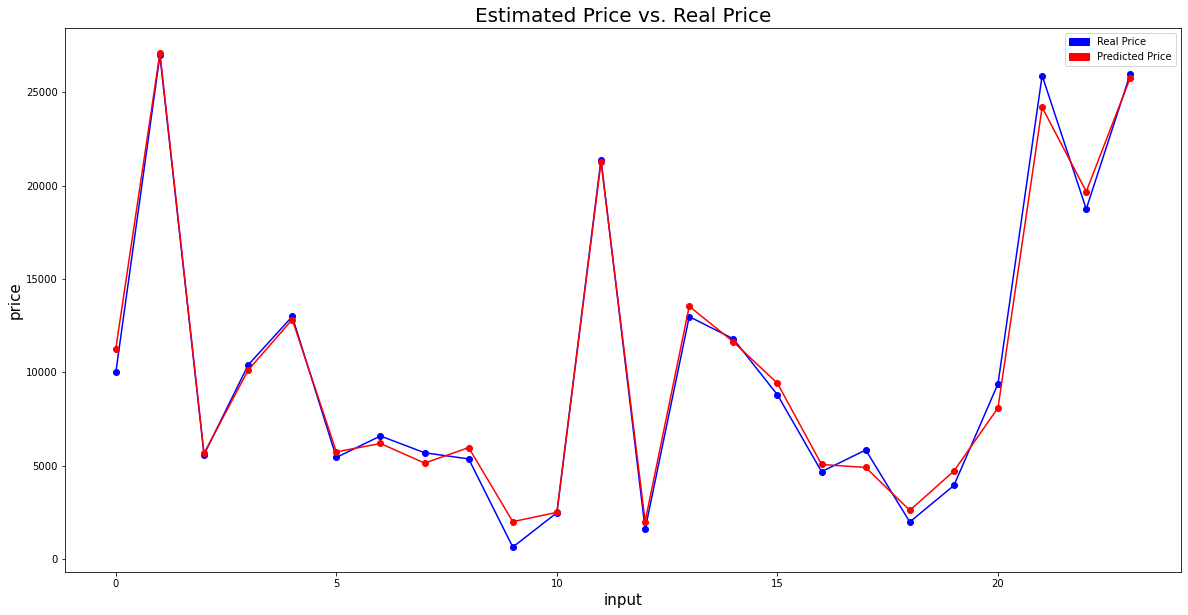

In [48]:
rf_pred= model.predict(X_tp)
fig = plt.figure(figsize=(20,10))
plt.title("Estimated Price vs. Real Price",fontsize=20)
plt.xlabel("input", fontsize=15)
plt.ylabel("price", fontsize=15)

plt.plot(x_input,y_tp,marker='o',color='blue')
blue_patch = mpatches.Patch(color='blue', label= 'Real Price')

plt.plot(x_input,rf_pred,marker='o',color='red')
red_patch = mpatches.Patch(color='red', label= 'Predicted Price')

plt.legend(handles=[blue_patch,red_patch])
plt.show()

#### Comparision between all above models

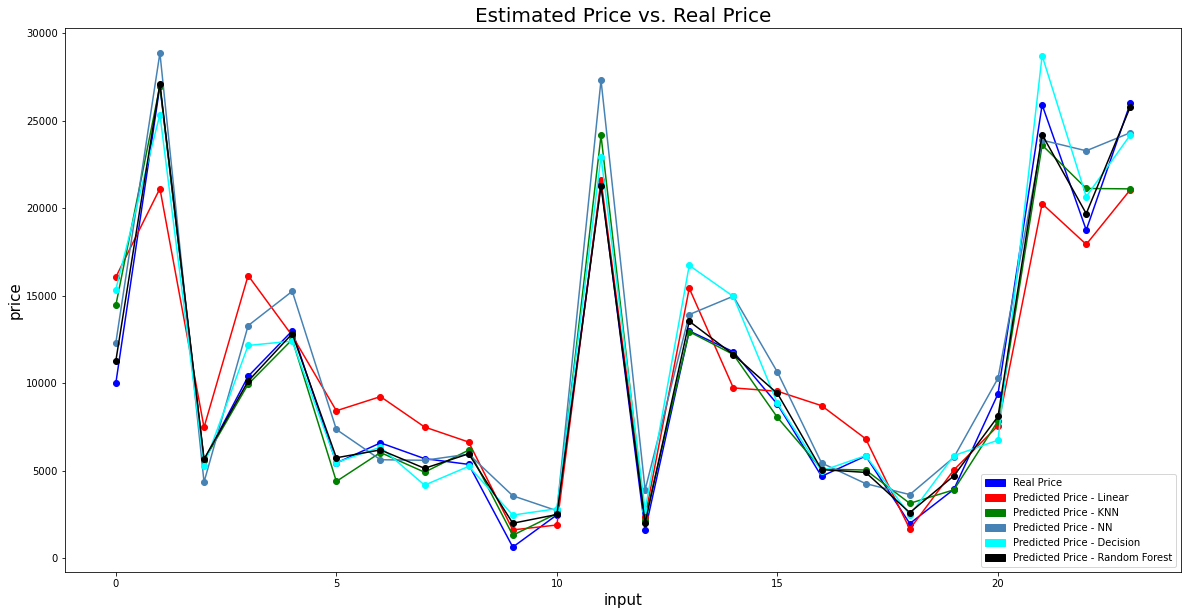

In [49]:
fig = plt.figure(figsize=(20,10))
plt.title("Estimated Price vs. Real Price",fontsize=20)
plt.xlabel("input", fontsize=15)
plt.ylabel("price", fontsize=15)
plt.plot(x_input,y_tp,marker='o',color='blue')
blue_patch = mpatches.Patch(color='blue', label= 'Real Price')

plt.plot(x_input,lin_pred,marker='o',color='red')
red_patch = mpatches.Patch(color='red', label= 'Predicted Price - Linear')

plt.plot(x_input,knnei_pred,marker='o',color='green')
green_patch = mpatches.Patch(color='green', label= 'Predicted Price - KNN')

plt.plot(x_input,nni_pred,marker='o',color='steelblue')
steelblue_patch = mpatches.Patch(color='steelblue', label= 'Predicted Price - NN')

plt.plot(x_input,dec_pred,marker='o',color='cyan')
cyan_patch = mpatches.Patch(color='cyan', label= 'Predicted Price - Decision')

plt.plot(x_input,rf_pred,marker='o',color='black')
black_patch = mpatches.Patch(color='black', label= 'Predicted Price - Random Forest')

plt.legend(handles=[blue_patch,red_patch,green_patch,steelblue_patch,cyan_patch,black_patch])
plt.show()

### Important features

ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of ticklabels (8).

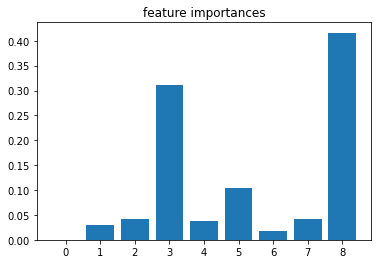

In [50]:
plt.figure()
plt.title("feature importances")
plt.bar(range(X.shape[1]), model.feature_importances_, align="center")
plt.xticks(range(9), ('vehicleType', 'gearbox', 'powerPS', 'model', 'kilometer', 'fuelType', 'brand', 'vehicleAge'), rotation=90 )
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
Regressors = [("linear_regression", linear_model),
               ("Kneighbor", neigh), 
               ("MLP Regressor", nn_model), 
               ("Decision Tree", regr_1), 
               ("Random Forest", model)]

 

for name, regressor in Regressors:
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)

 

    print("For "+ name +", mean square error and mean absolute error were:")
    print(sqrt(mean_squared_error(y_test,predictions)))
    print(mean_absolute_error(y_test,predictions))
    print("")